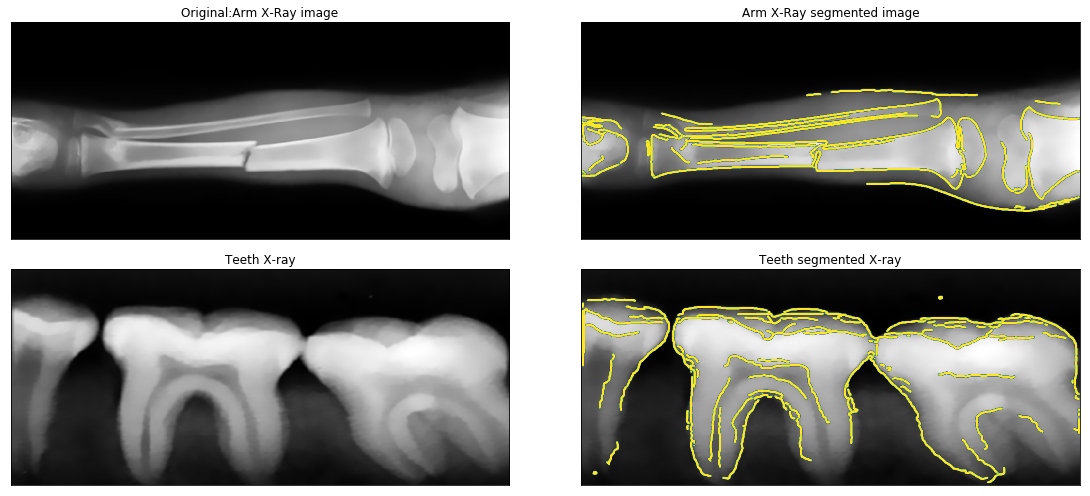

In [4]:
import matplotlib.pyplot as plt
from skimage import io
from skimage import restoration
from skimage import img_as_float
from skimage import feature
from skimage.transform import resize



 
 
im_bone=io.imread('resources/bone.jpg' ,as_grey=True)
im_float_bone = img_as_float(im_bone)
im_denoised_bone = restoration.denoise_nl_means(im_float_bone, h=0.05  )
edges_bone = feature.canny(im_denoised_bone, sigma=0.2, low_threshold=0.07, \
                      high_threshold=0.18)

im_teeth =io.imread('resources/teeth.jpg' ,as_grey=True)
im_teeth_resized=resize(im_teeth, (447, 1030))
im_float_teeth = img_as_float(im_teeth_resized)
im_denoised_teeth = restoration.denoise_nl_means(im_float_teeth, h=0.05  )
edges_teeth = feature.canny(im_denoised_teeth, sigma=0.2, low_threshold=0.07, \
                      high_threshold=0.18)

 




fig, axes = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=True,figsize=(16, 7),subplot_kw={'adjustable': 'box-forced'})
axes[0,0].imshow(im_denoised_bone, cmap='gray')
axes[0,0].set_xticks([]), axes[0,0].set_yticks([])
axes[0,0].set_title("Original:Arm X-Ray image")

axes[0,1].imshow(im_denoised_bone, cmap='gray')
axes[0,1].set_title("Arm X-Ray segmented image")
axes[0,1].contour(edges_bone)


axes[1,0].imshow(im_denoised_teeth, cmap='gray')
axes[1,0].set_xticks([]), axes[1,0].set_yticks([])
axes[1,0].set_title("Teeth X-ray")

axes[1,1].imshow(im_denoised_teeth, cmap='gray')
axes[1,1].set_title("Teeth segmented X-ray")
axes[1,1].contour(edges_teeth)


plt.tight_layout()
plt.show()